In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义函数
def true_function(x):
    return 2 * x**2 + 3 * x + 5

# 生成训练集和测试集
np.random.seed(42)

# 生成随机数据点
num_points = 100
X_train = np.random.uniform(-10, 10, num_points)
y_train = true_function(X_train) + np.random.normal(0, 5, num_points)

X_test = np.linspace(-10, 10, 100)
y_test = true_function(X_test)

In [3]:
# 定义ReLU激活函数
def relu(x):
    return np.maximum(0, x)

In [4]:
# 定义神经网络的前向传播
def forward_pass(X, W1, b1, W2, b2):
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = relu(hidden_layer_input)
    y_pred = np.dot(hidden_layer_output, W2) + b2
    return hidden_layer_input, hidden_layer_output, y_pred

In [5]:
# 定义损失函数（均方误差）
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [6]:
# 反向传播实现
def backward_pass(X, y_true, hidden_layer_input, hidden_layer_output, y_pred, W1, W2, b1, b2, learning_rate):
    output_error = (y_pred - y_true) / len(y_pred)
    output_gradient = output_error

    hidden_error = np.dot(output_gradient, W2.T)
    hidden_gradient = (hidden_error > 0) * 1  # ReLU的导数

    W2 -= learning_rate * np.dot(hidden_layer_output.T, output_gradient)
    b2 -= learning_rate * np.sum(output_gradient, axis=0)

    W1 -= learning_rate * np.dot(X.T, hidden_gradient)
    b1 -= learning_rate * np.sum(hidden_gradient, axis=0)

    return W1, b1, W2, b2

In [7]:
# 修改训练神经网络函数，采用小批量梯度下降
def train_neural_network(X_train, y_train, batch_size=10, num_epochs=1000, learning_rate=0.01):
    input_size = X_train.shape[1]
    hidden_size = 64
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    num_batches = len(X_train) // batch_size

    for epoch in range(num_epochs):
        loss_total = 0
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size

            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            hidden_layer_input, hidden_layer_output, y_pred = forward_pass(X_batch, W1, b1, W2, b2)
            loss = mean_squared_error(y_batch, y_pred)
            loss_total += (loss / num_batches)

            W1, b1, W2, b2 = backward_pass(X_batch, y_batch, hidden_layer_input, hidden_layer_output, y_pred, W1, W2, b1, b2, learning_rate)

        if (epoch+1) % 100 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss_total}")

    return W1, b1, W2, b2

In [8]:
# 测试集上的预测
def predict(X_test, W1, b1, W2, b2):
    _, _, y_pred = forward_pass(X_test, W1, b1, W2, b2)
    return y_pred

In [9]:
# 训练神经网络
W1, b1, W2, b2 = train_neural_network(X_train.reshape(-1,1), y_train.reshape(-1,1), batch_size=10, num_epochs=5000, learning_rate=1e-5)

Epoch 100, Loss: 443.4450882819704
Epoch 200, Loss: 426.1370765287227
Epoch 300, Loss: 410.6686176690201
Epoch 400, Loss: 394.9444423972361
Epoch 500, Loss: 378.8326002924257
Epoch 600, Loss: 366.5458103968898
Epoch 700, Loss: 355.29248231378233
Epoch 800, Loss: 342.03216679042526
Epoch 900, Loss: 328.40969129578
Epoch 1000, Loss: 314.5218956167932
Epoch 1100, Loss: 300.0740014640625
Epoch 1200, Loss: 286.8856602786599
Epoch 1300, Loss: 273.57835096168776
Epoch 1400, Loss: 258.25888151208204
Epoch 1500, Loss: 246.302335975006
Epoch 1600, Loss: 237.765788439422
Epoch 1700, Loss: 229.25206957547843
Epoch 1800, Loss: 218.11046862099488
Epoch 1900, Loss: 209.13677491481928
Epoch 2000, Loss: 200.65588561560222
Epoch 2100, Loss: 192.48324910606559
Epoch 2200, Loss: 185.39000643371483
Epoch 2300, Loss: 179.01796933511423
Epoch 2400, Loss: 172.54782918698837
Epoch 2500, Loss: 163.989321983374
Epoch 2600, Loss: 155.08944024315585
Epoch 2700, Loss: 147.39807180024042
Epoch 2800, Loss: 140.590119

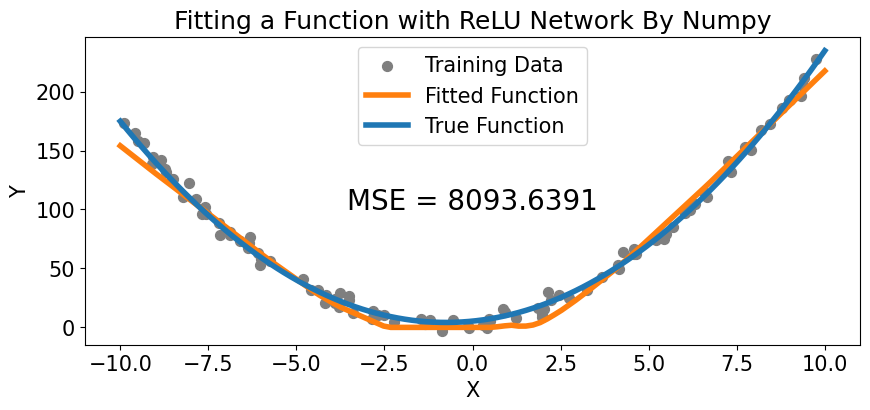

In [10]:
#预测结果
predictions = predict(X_test.reshape(-1,1), W1, b1, W2, b2)
loss_test = mean_squared_error(predictions, y_test)
# 绘制结果
plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 15})
plt.scatter(X_train, y_train, s = 50, c = '#7f7f7f', label='Training Data')
plt.plot(X_test, predictions, c = '#ff7f0e', linewidth = 4, label='Fitted Function')
plt.plot(X_test, y_test, c = '#1f77b4', linewidth = 4, label='True Function')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Function with ReLU Network By Numpy')
plt.text(0, 100, f'MSE = {loss_test:.4f}', fontsize=20, ha='center')
plt.show()